# Analytical Approach to Enhance Customer Retention at Model Fitness

**Introduction:**
In today's competitive fitness industry, customer churn poses a significant challenge for gym chains like Model Fitness. Leveraging analytical data, Model Fitness aims to develop a robust customer interaction strategy to mitigate churn and enhance retention rates.

**Predictive Modeling for Churn Probability:**
By analyzing historical data, we can develop predictive models to estimate the probability of churn for each customer in the upcoming month. Utilizing machine learning algorithms such as logistic regression or random forests, we can identify key indicators that signal potential churn, enabling proactive intervention strategies.

**User Segmentation and Portraits:**
Through clustering techniques, we can categorize customers into distinct segments based on their behavior, demographics, and engagement patterns. Typical user portraits may include:
1. The Consistent Enthusiast: Regular attendees who demonstrate high engagement levels and a strong commitment to fitness goals.
2. The Seasonal Participant: Individuals who exhibit intermittent attendance, often influenced by external factors such as seasonal trends or lifestyle changes.
3. The Casual Observer: Infrequent visitors with sporadic attendance, indicating a lack of long-term commitment to fitness routines.

**Factors Influencing Churn:**
Analyzing churn patterns reveals several factors that significantly impact customer retention:
1. Frequency of gym visits: Customers who attend regularly are less likely to churn.
2. Membership tenure: Longer-tenured members tend to exhibit higher retention rates.
3. Engagement with fitness programs and classes: Active participation in group activities correlates with lower churn probabilities.
4. Customer feedback and satisfaction scores: Dissatisfied customers are more prone to churn, emphasizing the importance of addressing service quality issues promptly.

**Recommendations for Enhancing Customer Service:**
1. Targeted Engagement Strategies:
   - Tailor marketing campaigns and promotional offers to address the specific needs and preferences of each customer segment.
   - Implement personalized communication channels, such as targeted email newsletters or SMS reminders, to foster ongoing engagement.
2. Enhance Member Experience:
   - Introduce loyalty programs or rewards systems to incentivize consistent attendance and foster a sense of community among members.
   - Invest in staff training programs to ensure exceptional customer service and address any concerns or grievances promptly.
3. Data-Driven Decision Making:
   - Continuously monitor customer feedback and satisfaction metrics to identify areas for improvement and prioritize strategic initiatives.
   - Leverage predictive analytics to forecast churn trends and allocate resources effectively to retain at-risk customers.

**Conclusion:**
By harnessing the power of data analytics, Model Fitness can develop a comprehensive customer retention strategy to minimize churn and foster long-term loyalty. By understanding the unique needs and behaviors of different customer segments, implementing targeted engagement tactics, and prioritizing customer satisfaction, Model Fitness can position itself as a leader in the competitive fitness market while maximizing customer lifetime value.


Step 1. Load the librariaries, open the data file and read the general information

In [1]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
from sklearn.utils import class_weight
from sklearn.feature_selection import SelectFromModel
#Standard libraries for data visualization:
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
import plotly.express as px 
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 

Import the dataset: Let’s load the input dataset into the python notebook in the current working directory.

In [2]:
try:
    df=pd.read_csv('/datasets/gym_churn_us.csv',sep=',')
    
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/gym_churn_us.csv',sep=',')

### Carry out exploratory data analysis (EDA)

Study the summary information on the DataFrame to find out:
* Whether there are any categorical fields
* Whether any features contain missing values

In [3]:
df.shape

(4000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
df.sample(10)

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
3453       1              0        0              0      1                1   
2607       1              1        0              0      1                1   
856        0              1        1              1      0                1   
3328       0              1        1              1      1                1   
2468       1              1        1              0      1                1   
3455       1              1        1              1      1               12   
2892       0              1        1              0      1               12   
1349       1              0        1              0      1                1   
560        1              1        0              0      1                1   
265        1              1        0              0      1               12   

      Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
3453             0   28                    144.239696                    1.0   
2607             1   28                      7.614528                    1.0   
856              1   27                     62.179562                    1.0   
3328             1   33                    243.298215                    1.0   
2468             0   26                    187.534826                    1.0   
3455             0   27                     64.342715                   10.0   
2892             0   27                    389.792906                    7.0   
1349             0   29                      5.799498                    1.0   
560              0   29                    249.582224                    1.0   
265              0   27                    212.187203                   10.0   

      Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
3453         1                   1.138963                           0.524851   
2607         2                   1.920819                           1.737227   
856          0                   1.327427                           0.249689   
3328         3                   3.504920                           3.712445   
2468         1                   2.050437                           2.002119   
3455         9                   3.030821                           2.982683   
2892         2                   3.751801                           3.822226   
1349         6                   2.282678                           2.414892   
560          0                   0.770332                           0.000000   
265          3                   0.063541                           0.000000   

      Churn  
3453      1  
2607      1  
856       1  
3328      0  
2468      1  
3455      0  
2892      0  
1349      0  
560       1  
265       0

The dataset includes the following fields:
* 'Churn' — the fact of churn for the month in question
Current dataset fields:

User data for the preceding month:

* 'gender'
* 'Near_Location' — whether the user lives or works in the neighborhood where the gym is located
* 'Partner' — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)
* Promo_friends — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)
* 'Phone' — whether the user provided their phone number
* 'Age'
* 'Lifetime' — the time (in months) since the customer first came to the gym

Data from the log of visits and purchases and data on current membership status:

* 'Contract_period' — 1 month, 3 months, 6 months, or 1 year
* 'Month_to_end_contract' — the months remaining until the contract expires
* 'Group_visits' — whether the user takes part in group sessions
* 'Avg_class_frequency_total' — average frequency of visits per week over the customer's lifetime
* 'Avg_class_frequency_current_month' — average frequency of visits per week over the preceding month
* 'Avg_additional_charges_total' — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.


In [6]:
df.describe()

gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.000000    27.000000   
50%           1.000000      0.000000    29.000000   
75%           6.000000      1.000000    31.000000   
max          12.000000      1.000000    41.000000   

       Avg_additional_charges_total  Month_to_end_contract     Lifetime  \
count                   4000.000000            4000.000000  4000.000000   
mean                     146.943728               4.322750     3.724750   
std                       96.355602               4.191297     3.749267   
min                        0.148205               1.000000     0.000000   
25%                       68.868830               1.000000     1.000000   
50%                      136.220159               1.000000     3.000000   
75%                      210.949625               6.000000     5.000000   
max                      552.590740              12.000000    31.000000   

       Avg_class_frequency_total  Avg_class_frequency_current_month  \
count                4000.000000                        4000.000000   
mean                    1.879020                           1.767052   
std                     0.972245                           1.052906   
min                     0.000000                           0.000000   
25%                     1.180875                           0.963003   
50%                     1.832768                           1.719574   
75%                     2.536078                           2.510336   
max                     6.023668                           6.146783   

             Churn  
count  4000.000000  
mean      0.265250  
std       0.441521  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

A quick describe method reveals that the in average, there customers are coming to the gym 3.7 months ( so we have mostly relatively new customers ) and are paying 146$ per month on other gym services. In average, they attend 1 to 2 classes per week and the average age is 29 years old.

It’s always a good practice to ensure that we don’t have null values in the dataset.

In [7]:
df.isna().any()

gender                               False
Near_Location                        False
Partner                              False
Promo_friends                        False
Phone                                False
Contract_period                      False
Group_visits                         False
Age                                  False
Avg_additional_charges_total         False
Month_to_end_contract                False
Lifetime                             False
Avg_class_frequency_total            False
Avg_class_frequency_current_month    False
Churn                                False
dtype: bool

Rename the columns using lowercase to speed up further coding:

In [8]:
df.columns=df.columns.str.lower()

Look at the mean feature values in two groups: for those who left (churn) and for those who stayed method.

In [9]:
churns=df.groupby('churn').agg(['count', 'mean'])
display(churns)

gender           near_location           partner            \
       count      mean         count      mean   count      mean   
churn                                                              
0       2939  0.510037          2939  0.873086    2939  0.534195   
1       1061  0.510839          1061  0.768143    1061  0.355325   

      promo_friends           phone           contract_period            \
              count      mean count      mean           count      mean   
churn                                                                     
0              2939  0.353522  2939  0.903709            2939  5.747193   
1              1061  0.183789  1061  0.902922            1061  1.728558   

      group_visits             age            avg_additional_charges_total  \
             count      mean count       mean                        count   
churn                                                                        
0             2939  0.464103  2939  29.976523                         2939   
1             1061  0.268615  1061  26.989632                         1061   

                  month_to_end_contract           lifetime            \
             mean                 count      mean    count      mean   
churn                                                                  
0      158.445715                  2939  5.283089     2939  4.711807   
1      115.082899                  1061  1.662582     1061  0.990575   

      avg_class_frequency_total           avg_class_frequency_current_month  \
                          count      mean                             count   
churn                                                                         
0                          2939  2.024876                              2939   
1                          1061  1.474995                              1061   

                 
           mean  
churn            
0      2.027882  
1      1.044546

In [10]:

target_instance = df['churn'].value_counts().to_frame()
target_instance = target_instance.reset_index()
display(target_instance)

index  churn
0      0   2939
1      1   1061

In [11]:
target_instance = target_instance.rename(columns={'index': 'category'})
fig = px.pie(target_instance, values='churn', names='category', color_discrete_sequence=["green", "red"],
             title='Distribution of Churn')
fig.show()

We’re trying to predict users tWe’re trying to predict users that left the company in the previous month. It’s a binary classification problem with an unbalanced target

Churn: No – 73.5%
Churn: Yes – 26.5%

Churn prediction is a binary classification problem, as customers either churn or are retained in a given period. Two questions need answering to guide model building:
Which features make customers churn or retain? What are the most important features to train a model with high performance?

In [12]:

#Defining bar chart function


def bar(feature, df=df ):
    """ this function will automate the bar plot creation for the various categorical 
    features relatively to churn.
    """
    df.loc[df.churn==0,'churn'] = "No"   #convert 0 to No in all data instances
    df.loc[df.churn==1,'churn'] = "Yes"  #convert 1 to Yes in all 
    
    #Groupby the categorical feature
    temp_df = df.groupby([feature, 'churn']).size().reset_index()
    temp_df = temp_df.rename(columns={0:'Count'})
    #Calculate the value counts of each distribution and it's corresponding Percentages
    value_counts_df = df[feature].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_df.iterrows()]
    #Calculate the value counts of each distribution and it's corresponding Percentages
    num_list = [num[1][1] for num in value_counts_df.iterrows()]
    div_list = [element / sum(num_list) for element in num_list]
    percentage = [round(element * 100,1) for element in div_list]
    #Defining string formatting for graph annotation
    #Numeric section
    def num_format(list_instance):
        formatted_str = ''
        for index,num in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{num}%, ' #append to empty string(formatted_str)
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{num}% & '
            else:
                formatted_str=formatted_str+f'{num}%'
        return formatted_str
    #Categorical section
    def str_format(list_instance):
        formatted_str = ''
        for index, cat in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{cat}, '
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{cat} & '
            else:
                formatted_str=formatted_str+f'{cat}'
        return formatted_str
    #Running the formatting functions
    num_str = num_format(percentage)
    cat_str = str_format(categories)

    #Setting graph framework
    
    fig = px.bar(temp_df, x=feature, y='Count', color='churn', title=f'Churn rate by {feature}', barmode="group", color_discrete_sequence=["green", "red"])
    fig.add_annotation(
                text=f'Value count of distribution of {cat_str} are<br>{num_str} percentage respectively.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.4,
                y=1.3,
                bordercolor='black',
                borderwidth=1)
    fig.update_layout(
       
        margin=dict(r=400),
    )

    return fig.show()


In [13]:
for col in df.drop(columns=['avg_additional_charges_total','avg_class_frequency_total','avg_class_frequency_current_month','churn']):
    bar(col)


So far, it looks like the factors which have a higher impact on the churn, are age and lifetime: younger people tend to quit more than older ones, as well as newer client have an higher rate of churn, compared to customers that already stayed for more than 3 months.

let's explore some Data from the log of visits and purchases:

In [14]:

def hist(feature):
    """ this function will create an histogram using our df, 
        for the feature that will be specified when calling the function
    """
    group_df = df.groupby([feature, 'churn']).size().reset_index()
    group_df = group_df.rename(columns={0: 'Count'})
    fig = px.histogram(group_df, x=feature, y='Count', color='churn', marginal='box', title=f'Churn rate frequency to {feature} distribution', color_discrete_sequence=["green", "red"])
    fig.show()

In [15]:
hist('avg_additional_charges_total')

Customers who spend in additional services are less prone to quit. Probably becuse they are more interested in the total offer of our gym.

In [16]:
hist('avg_class_frequency_total')

people who follow 2-3 classes a week and more, are more engaged and tend to quit less

In [17]:
hist('avg_class_frequency_current_month')

Similar to the previous results.

The majority of algorithms are resistant to outliers, but some aren't. For instance, in linear models, outliers can pull the relation to one side or the other. The standard procedure for working with outliers is as follows: Define the threshold beyond which an observation is considered an outlier (for instance, below the 5th or above the 95th percentile). Remove such observations from the sample (good for large samples with a small number of outliers) or replace them with the mean or maximum/minimum value for this feature.


In our case, I will not procced with removal of outliers, because i think it migh lead me to a loss of informations.


Let’s have a look into the positive and negative correlations graphically in the next step.

In [18]:
df.loc[df.churn=='No','churn'] = 0   #convert 0 to No in all data instances
df.loc[df.churn=='Yes','churn'] = 1  #convert 1 to Yes in all 
    

In [19]:
df.churn

0       0
1       0
2       0
3       0
4       0
       ..
3995    0
3996    1
3997    0
3998    0
3999    0
Name: churn, Length: 4000, dtype: object

finding correlations:

In [20]:

        
df['churn']=df['churn'].astype('int')      
correlations = df.corrwith(df.churn)
correlations = correlations[correlations!=1]
positive_correlations = correlations[
correlations >0].sort_values(ascending = False)
negative_correlations =correlations[
correlations<0].sort_values(ascending = False)
print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)


Most Positive Correlations: 
 gender    0.000708
dtype: float64

Most Negative Correlations: 
 phone                               -0.001177
near_location                       -0.128098
partner                             -0.157986
promo_friends                       -0.162233
group_visits                        -0.175325
avg_additional_charges_total        -0.198697
avg_class_frequency_total           -0.249715
month_to_end_contract               -0.381393
contract_period                     -0.389984
age                                 -0.404735
avg_class_frequency_current_month   -0.412348
lifetime                            -0.438220
dtype: float64


plotting correlations:

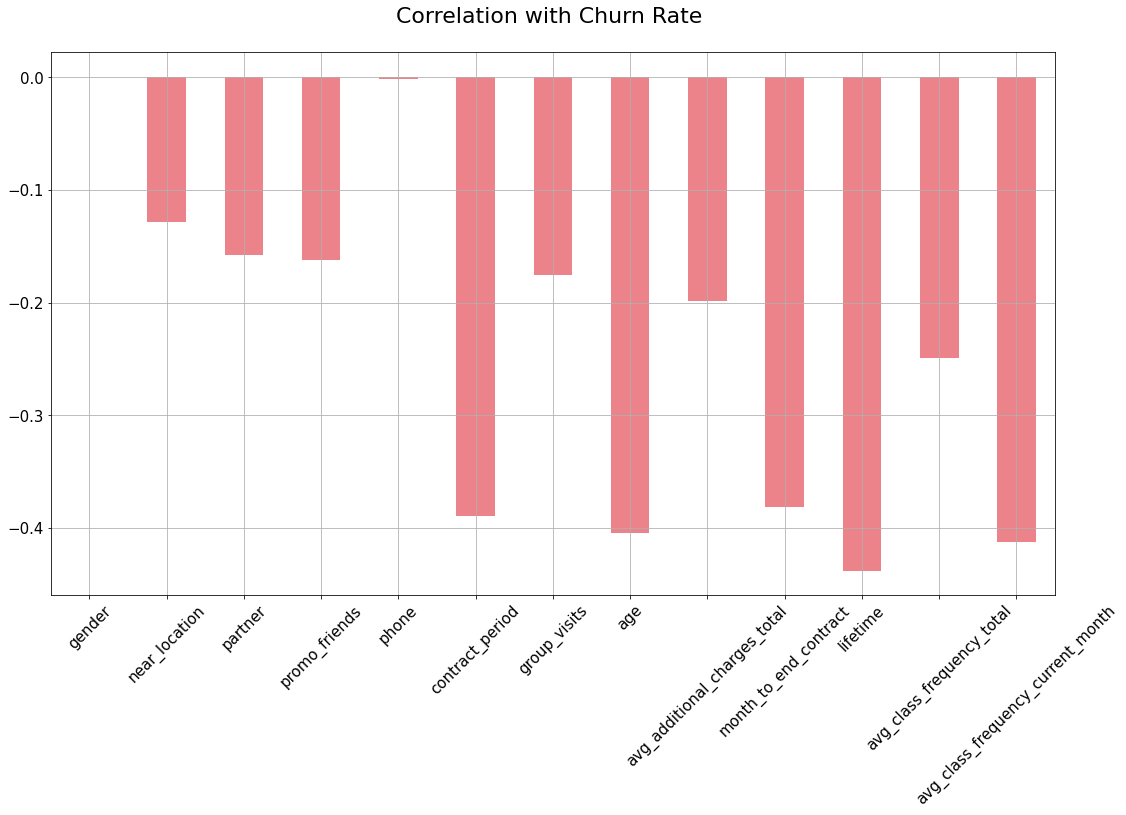

In [21]:
correlations = df.corrwith(df.churn)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.show()

Most of the features have a slight negative correlation with churn. For better clarity, let' build a correlation matrix and plot it:


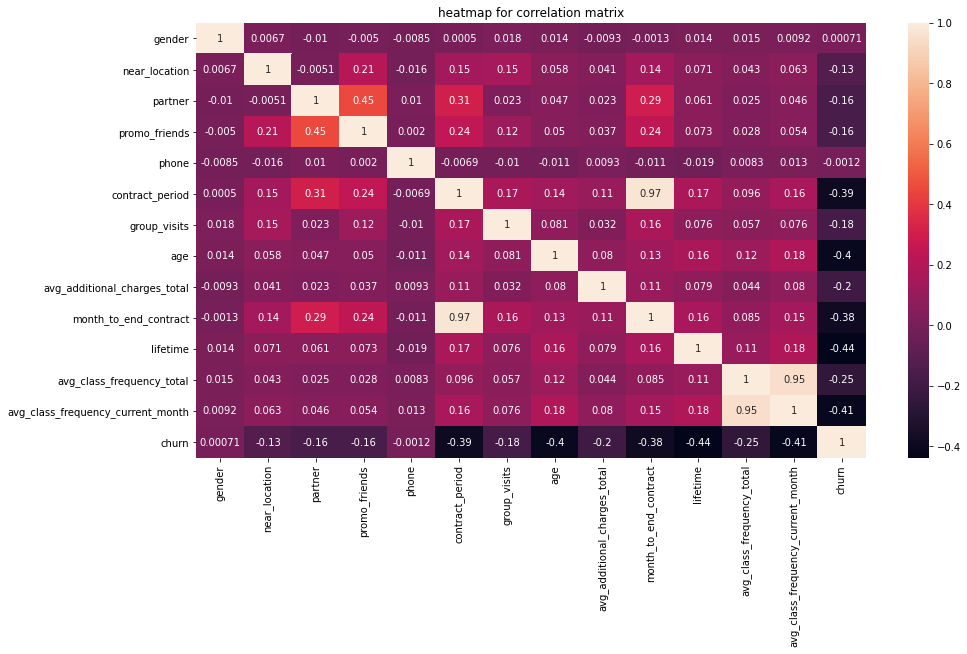

In [22]:

cm = df.corr() #calculate correlation matrix
fig, ax = plt.subplots(figsize=(15, 8))

#plot an annotated heatmap for correlation matrix

sns.heatmap(cm, annot=True)

plt.title('heatmap for correlation matrix')
plt.show()

Correlation measures the linear relationship between two variables. Features with high correlation are more linearly dependent and have almost the same effect on the dependent variable. So, when two features have a high correlation, we can drop one of them. In our case, we can drop highly correlated features like avg_class_frequency_total and month_to_end_contract.

Check Multicollinearity using VIF: Let's try to look into multicollinearity using Variable Inflation Factors (VIF). Unlike Correlation matrix, VIF determines the strength of the correlation of a variable with a group of other independent variables in a dataset. VIF starts usually at 1 and anywhere exceeding 10 indicates high multicollinearity between the independent variables.

In [23]:
def calc_vif(X):
    '''the function will determine VIF, strength of the correlation of a variable
    with a group of other independent variables in a dataset'''
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
    for i in range(X.shape[1])]
    return(vif)

calc_vif(df)

variables        VIF
0                              gender   2.033945
1                       near_location   6.843544
2                             partner   2.628084
3                       promo_friends   1.958563
4                               phone   9.555737
5                     contract_period  39.547587
6                        group_visits   1.817803
7                                 age  21.903903
8        avg_additional_charges_total   3.404374
9               month_to_end_contract  38.953600
10                           lifetime   2.416772
11          avg_class_frequency_total  70.208414
12  avg_class_frequency_current_month  63.967246
13                              churn   2.570241

Let’s try to drop one of the correlated features to see if it help us in bringing down the multicollinearity between correlated features:avg_class_frequency_total and month_to_end_contract.

In [24]:
df = df.drop(columns = ['avg_class_frequency_total','month_to_end_contract'])
#Revalidate Colinearity:

calc_vif(df)

    


variables        VIF
0                              gender   2.033014
1                       near_location   6.842750
2                             partner   2.624968
3                       promo_friends   1.957832
4                               phone   9.553282
5                     contract_period   2.682700
6                        group_visits   1.815121
7                                 age  21.724746
8        avg_additional_charges_total   3.401734
9                            lifetime   2.415084
10  avg_class_frequency_current_month   4.483662
11                              churn   1.911535

After dropping the variables, VIF values for all the independent variables have decreased to a considerable extent.


### Exploratory Data Analysis Concluding Remarks:
Let’s try to summarise some of the key findings from this EDA:
* The dataset does not have any missing or erroneous data values.
* most of features have sligh negative correlation with churn
* The dataset is imbalanced with the majority of customers being active.
* There is multicollinearity between avg_class_frequency_current_month and avg_class_frequency_total, between month_to_end_contract and contract_period.
* Most of the customers who tend to quit in the dataset are younger people.
* There are a lot of new customers in the organization 




## Build a model to predict user churn

Build a binary classification model for customers where the target feature is the user's leaving next month.

Split the dataset into dependent and independent variables: Now we need to separate the dataset into X and y values. y would be the ‘Churn’ column whilst X would be the remaining list of independent variables in the dataset.

In [25]:
response = df['churn']
dataset = df.drop(columns='churn')

Generate training and test datasets: Let’s decouple the master dataset into training and test set with an 80%-20% ratio.


In [26]:
X_train, X_test, y_train, y_test = train_test_split(dataset, response,stratify=response, test_size = 0.2)
#to resolve any class imbalance - use stratify parameter.
print('X_train dataset:', X_train.shape)
print('y_train dataset:', y_train.shape)
print('X_test dataset: ', X_test.shape)
print('y_test dataset: ', y_test.shape)

X_train dataset: (3200, 11)
y_train dataset: (3200,)
X_test dataset:  (800, 11)
y_test dataset:  (800,)


Conduct Feature Scaling: It’s quite important to normalize the variables before conducting any machine learning (classification) algorithms so that all the training and test variables are scaled within a range of 0 to 1.


In [27]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

#### Model Selection

Let’s model each classification algorithm over the training dataset and evaluate their accuracy and standard deviation scores.
Classification Accuracy is one of the most common classification evaluation metrics to compare baseline algorithms as its the number of correct predictions made as a ratio of total predictions. However, it's not the ideal metric when we have class imbalance issue. Hence, let us sort the results based on the ‘Mean AUC’ value which is nothing but the model’s ability to discriminate between positive and negative classes.

Defining the modeling function

In [28]:

def modeling(alg, alg_name, params={}):
    '''model selection and performance evaluation'''
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred)
        print("f1_score: ",f_score)

    print_scores(alg, y_test, y_pred)
    return model

Running logistic regression model

In [29]:
log_model = modeling(LogisticRegression, 'Logistic Regression')



Logistic Regression
accuracy:  0.92875
precision:  0.8708133971291866
recall:  0.8584905660377359
f1_score:  0.8646080760095013


In [30]:
rf_model = modeling(RandomForestClassifier, "Random Forest Classification")

Random Forest Classification
accuracy:  0.91625
precision:  0.8606965174129353
recall:  0.8160377358490566
f1_score:  0.837772397094431


In [31]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))
#Evaluating Model Results:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=0, shuffle=True)
# accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(  
    model, X_train, y_train, cv=kfold, scoring='accuracy')
# roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(  
    model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)


Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  Accuracy STD
0  Logistic Regression         96.39         1.13          89.47          1.59
1        Random Forest         95.71         1.14          89.81          1.79

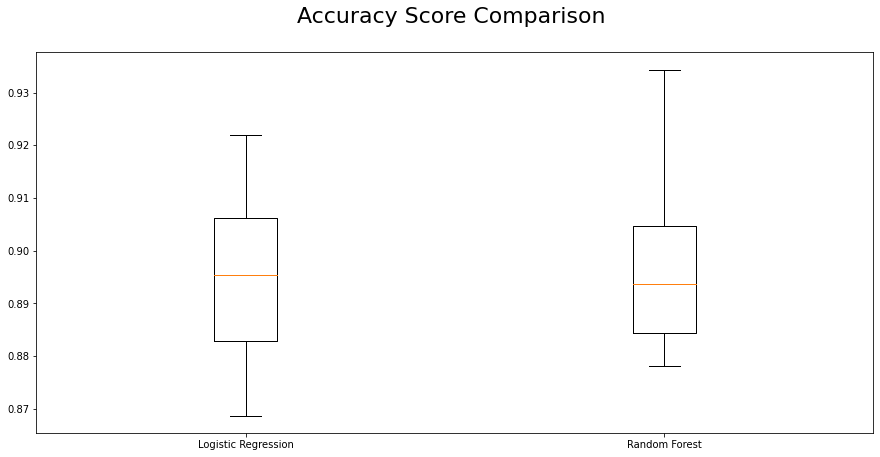

In [32]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.title('Accuracy Score Comparison \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

plt.show()


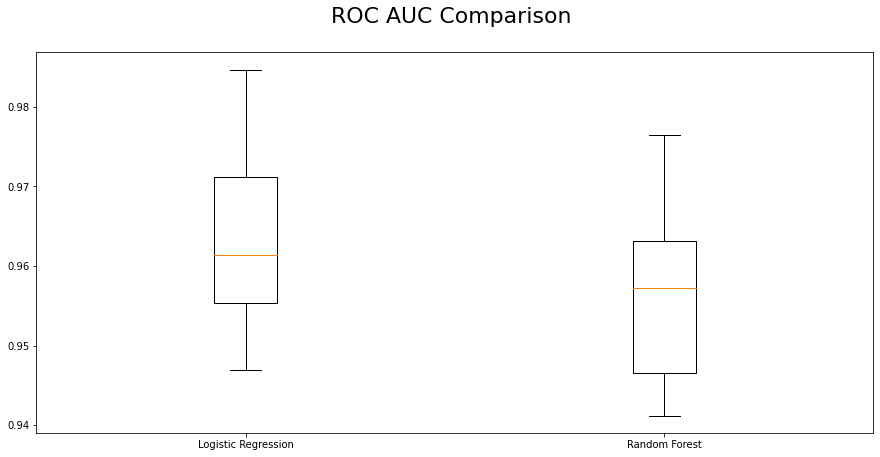

In [33]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")

plt.show()

Identify the optimal number of trees for Random Forest Model: here we are trying to find the optimal number of decision trees to compose the best random forest.


Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. As we know that before training the model with data, we divide the data into two parts – train data and test data. In cross-validation, the process divides the train data further into two parts – the train data and the validation data.


Primarily, it takes 4 arguments i.e. estimator, param_grid, cv, and scoring. The description of the arguments is as follows:

* 1. estimator – A scikit-learn model

* 2. param_grid – A dictionary with parameter names as keys and lists of parameter values.

* 3. scoring – The performance measure. For example, ‘r2’ for regression models, ‘precision’ for classification models.

* 4. cv – An integer that is the number of folds for K-fold cross-validation.

GridSearchCV can be used on several hyperparameters to get the best values for the specified 

In [34]:
import warnings

warnings.filterwarnings('ignore')


rfc = RandomForestClassifier()

params = {'n_estimators': [75, 90, 115, 130], 
          'criterion': ['gini', 'entropy'], 
          'max_depth': [10, 15, 20, 25, None], 
          'min_samples_leaf': [1, 2, 5, 10]
}

clf = GridSearchCV(rfc, params, cv = 5, scoring='accuracy')

#Here, we passed the estimator object rfc, param_grid as forest_params, cv = 5 and scoring method as accuracy in to GridSearchCV() as arguments.

# fitting clf to train set
clf.fit(X_train, y_train)

print(clf.best_params_)

print(clf.best_score_)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 130}
0.903125


This will give the combination of hyperparameters along with values that give the best performance of our estimate specified.

In [35]:
best_params = clf.best_params_
print(best_params)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 130}


Because our classes are unbalanced, we can make a class weights dictionary to feed into the model to help the model further differentiate between the classes by punishing the model harder for incorrect guesses. 

In [36]:
# A array object that contains the weights for both classes
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
# A dictionary object containing key-value pairs of both classes and # their weights
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}


Now that we’ve figured out the optimal values for the selected hyperparameters based on the values we’ve provided, we will create a new random forest model that will use these hyperparameter values.

In [37]:
best_forest = RandomForestClassifier(**best_params, class_weight=class_weights_dict)

In [38]:
# Fitting our model to the train set
fit_forest = best_forest.fit(X_train, y_train)
# Creating predicted variables to compare against y_test
y_pred = fit_forest.predict(X_test)
# making classification report 
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.94      0.94      0.94       588
           1       0.83      0.83      0.83       212

    accuracy                           0.91       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.91      0.91      0.91       800



Compare Baseline Classification Algorithms (2nd Iteration):
In the second iteration of comparing baseline classification algorithms, we would be using the optimised parameters for Random Forest models. Also, we know that false negatives are more costly than false positives in a churn and hence let’s use precision, recall and F2 scores as the ideal metric for the model selection.

In [39]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression', 
acc, prec, rec, f1, f2]], columns = ['Model', 
'Accuracy', 'Precision', 'Recall', 'F1 Score', 
'F2 Score'])
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)


                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression   0.92875   0.870813  0.858491  0.864608  0.860927


Random Forest:


In [40]:
# Fitting Random Forest to the Training set:
    
fit_forest = best_forest.fit(X_train, y_train)
# Creating predicted variables to compare against y_test
y_pred = fit_forest.predict(X_test)
#Evaluate results

accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Random Forest', 
acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results1 = results.append(model_results, ignore_index = True)
results1 = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results1)

           Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Random Forest   0.90625   0.815668  0.834906  0.825175  0.830986


From the 2nd iteration, we can definitely conclude that Random Forest classifier is an optimal model of choice for the given dataset as it has relatively the highest combination of precision, recall and F2 scores; giving most number of correct positive predictions while minimizing the false negatives. Hence, let's try to use Logistic Regression and evaluate its performance in the forthcoming sections.

***Train & evaluate Chosen Model***: Let’s fit the selected model on the training dataset and evaluate the results.

In [41]:
classifier = best_forest
classifier.fit(X_train, y_train)
# Predict the Test set results
y_pred = classifier.predict(X_test)
#Evaluate Model Results on Test Set:
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Random Forest classifier',
acc, prec, rec, f1, f2]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
print (results)

                      Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Random Forest classifier     0.915   0.833333  0.849057  0.841121  0.845865


In [42]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Random Forest Classifier Accuracy: 0.90 (+/- 0.03)


our k-fold Cross Validation results indicate that we would have an accuracy anywhere between 89% to 93% while running this model on any test set.

<Figure size 2016x1440 with 0 Axes>

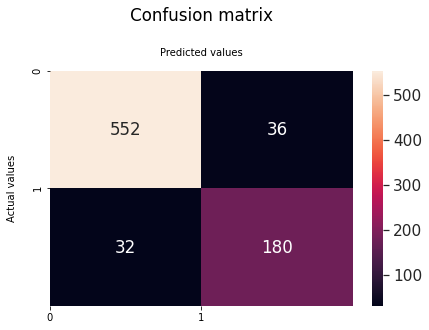

In [43]:
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g' 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual values\n')
plt.xlabel('Predicted values\n')
plt.show()

Visualize results on a Confusion Matrix: The Confusion matrix indicates that we have 549+176 correct predictions and 36+39 incorrect predictions.
Accuracy rate = number of correct predictions/ total predictions * 100

We have got an accuracy of 90%; signalling the characteristics of a reasonably good model.

***Predict Feature Importance:*** RandomForest allows us to determine the key features that have significance in predicting the target attribute (“Churn” in this project).



In [44]:
sel = SelectFromModel(best_forest)
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(class_weight={0: 0.680561463207146,
                                                               1: 1.8845700824499412},
                                                 criterion='entropy',
                                                 max_depth=20,
                                                 min_samples_leaf=2,
                                                 n_estimators=130))

In [45]:
sel.get_support()

array([False, False, False, False, False,  True, False,  True,  True,
        True,  True])

In [46]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

5

In [47]:
print(selected_feat)

Index(['contract_period', 'age', 'avg_additional_charges_total', 'lifetime',
       'avg_class_frequency_current_month'],
      dtype='object')


Text(0.5, 0, 'Random Forest Feature Importance')

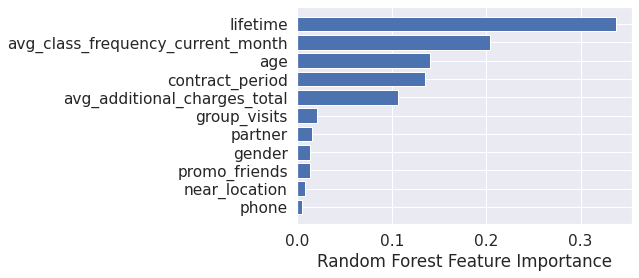

In [48]:
sorted_idx = best_forest.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], best_forest.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

The feature which will impact the churn the most, are: lifetime,avg_class_frequency_current_month, age and contract peiod


***Format Final Results:*** Unpredictability and risk are the close companions of any predictive models. Its always a good practice to build a propensity score besides an absolute predicted outcome. Instead of just retrieving a binary estimated target outcome (0 or 1), every ‘Customer ID’ could get an additional layer of propensity score highlighting their percentage of probability to take the target action.


In [49]:
lr_classifier = best_forest
lr_classifier.fit(X_train, y_train)
# Predict the Test set results
y_pred = lr_classifier.predict(X_test)
#probability score
y_pred_probs = lr_classifier.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]

In [50]:
final_results = pd.concat([X_test, y_test], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results["propensity_to_churn(%)"] = y_pred_probs
final_results["propensity_to_churn(%)"] = final_results["propensity_to_churn(%)"]*100
final_results["propensity_to_churn(%)"]=final_results["propensity_to_churn(%)"].round(2)
final_results = final_results[['churn', 'predictions', 'propensity_to_churn(%)']]
final_results ['Ranking'] = pd.qcut(final_results['propensity_to_churn(%)'].rank(method = 'first'),10,labels=range(10,0,-1))
print (final_results)

      churn  predictions  propensity_to_churn(%) Ranking
963       0            0                   32.96       4
2543      1            1                   77.71       2
1745      0            0                   29.16       4
1653      0            0                   45.62       3
3945      1            1                   91.76       2
...     ...          ...                     ...     ...
1155      0            0                    1.21       8
3526      0            0                    5.63       6
820       1            1                   90.93       2
1797      0            0                    7.23       6
3805      1            0                   47.46       3

[800 rows x 4 columns]


Save the Model and Model Deployment
Lastly, deploy the model to a server using ‘joblib’ library so that we can productionize the end-to-end machine learning framework. Later we can run the model over any new dataset to predict the probability of any customer to churn in months to come.



In [51]:
filename = 'final_model.model'
i = [lr_classifier]
joblib.dump(i,filename)

['final_model.model']

Conclusion

We made use of a customer churn dataset to build a machine learning classifier that predicts the propensity of any customer to churn in months to come with a reasonable accuracy score of 89% to 93%.

In [52]:
print(results1)

           Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Random Forest   0.90625   0.815668  0.834906  0.825175  0.830986


### Create user clusters

Set aside the column with data on churn and identify object (user) clusters:

In [53]:
sc = StandardScaler()
X_sc = sc.fit_transform(dataset)

linked = linkage(X_sc, method = 'ward') 

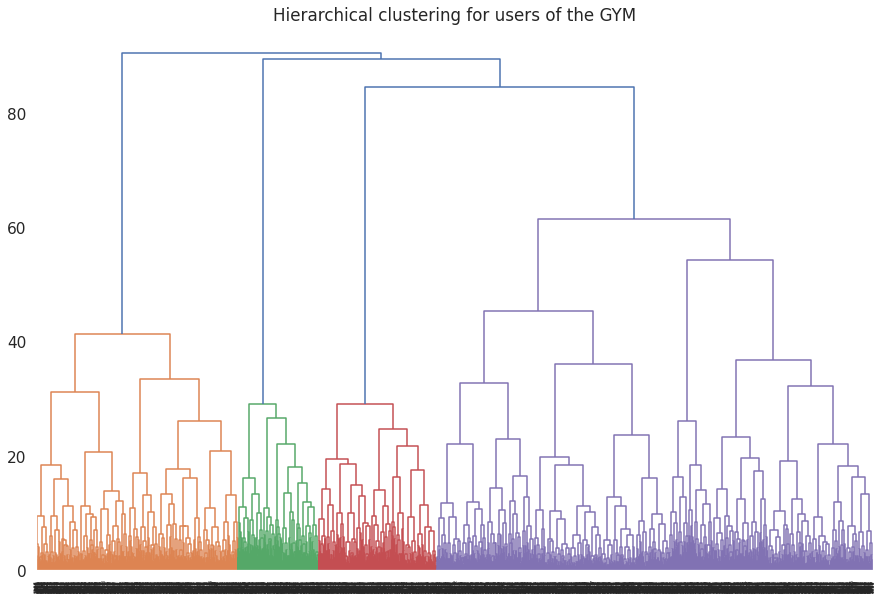

In [54]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for users of the GYM')
plt.show() 

The suggested optimal number of clusters (4) corresponds to the five different colors on the plot.

define the k_means model with 4 clusters

In [55]:
km = KMeans(n_clusters=4, random_state=42)

predict the clusters for observations (the algorithm assigns them a number from 0 to 4)

In [56]:
labels = km.fit_predict(X_sc)

In [57]:
# store cluster labels into the field of our dataset
df['cluster_km'] = labels

get the statistics of the mean feature values per cluster

In [58]:
df.groupby(['cluster_km']).mean()

gender  near_location   partner  promo_friends  phone  \
cluster_km                                                            
0           0.526951       0.921963  0.370072       0.004023    1.0   
1           0.504274       0.966762  0.867996       1.000000    1.0   
2           0.495448       0.670713  0.296662       0.044006    1.0   
3           0.523316       0.862694  0.471503       0.305699    0.0   

            contract_period  group_visits        age  \
cluster_km                                             
0                  5.893805      0.535800  30.572003   
1                  6.638177      0.516619  29.544160   
2                  1.946131      0.207891  27.554628   
3                  4.777202      0.427461  29.297927   

            avg_additional_charges_total  lifetime  \
cluster_km                                           
0                             173.536262  5.133548   
1                             151.931807  4.245964   
2                             118.680416  1.916540   
3                             144.208179  3.940415   

            avg_class_frequency_current_month     churn  
cluster_km                                               
0                                    2.253940  0.032180  
1                                    1.902015  0.129155  
2                                    1.212660  0.593323  
3                                    1.723967  0.266839

the means look pretty similar among the clusters, we can spot the biggest differences in contract_period and additional_charges

define the function for rendering graphs of paired features for the clusters

In [59]:
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    '''define the function for rendering graphs of paired features for the clusters'''
    plt.figure(figsize = (10, 10))
    sns.kdeplot(x=df[x_name], y=df[y_name],
           hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

render the graph for the paired "churn" and "avg_additional_charges_total" features

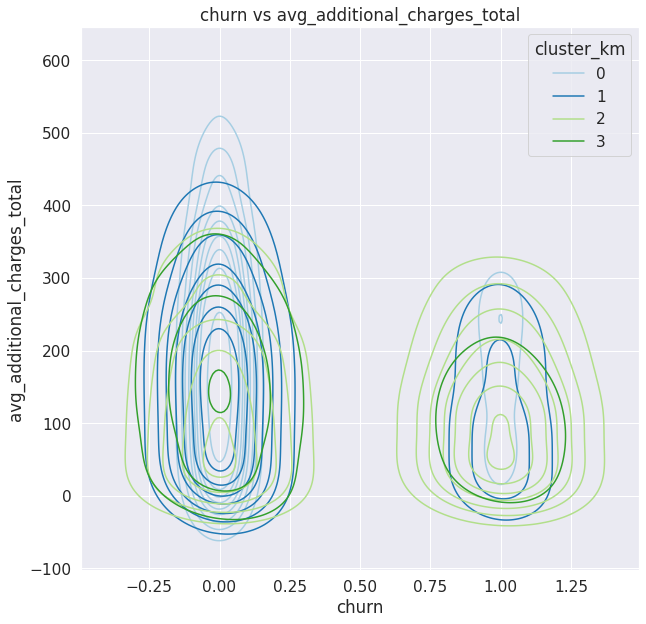

In [60]:
show_clusters_on_plot(df,'churn','avg_additional_charges_total', 'cluster_km')

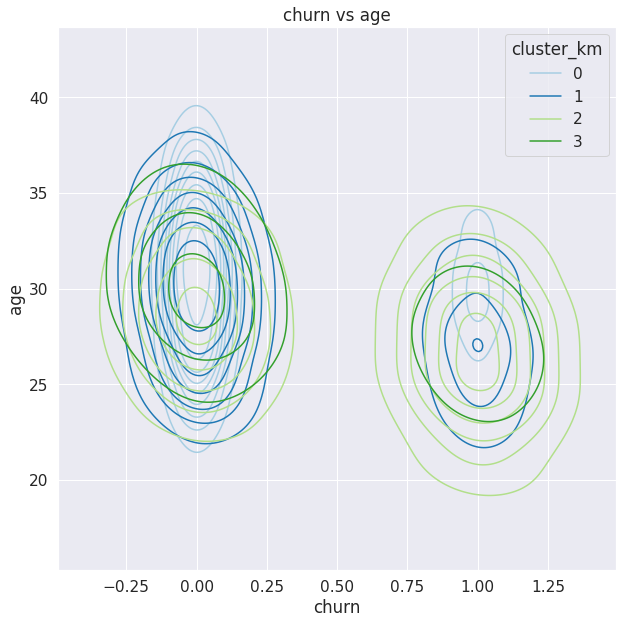

In [61]:
# render the graph for the paired "churn" and "age" features
show_clusters_on_plot(df, 'churn','age', 'cluster_km')

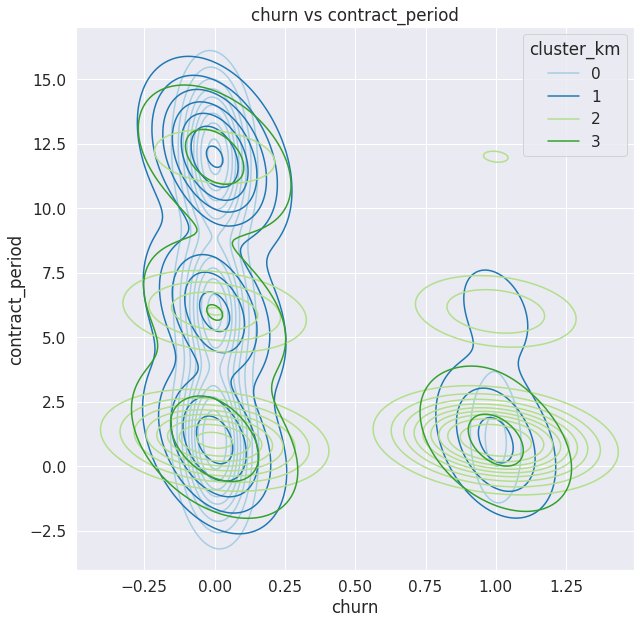

In [62]:
show_clusters_on_plot(df, 'churn','contract_period', 'cluster_km')

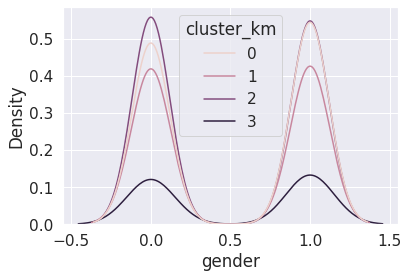

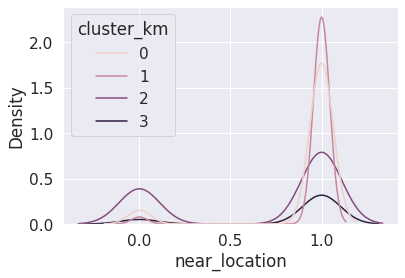

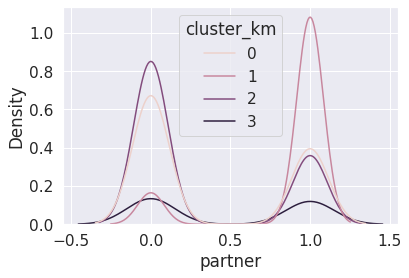

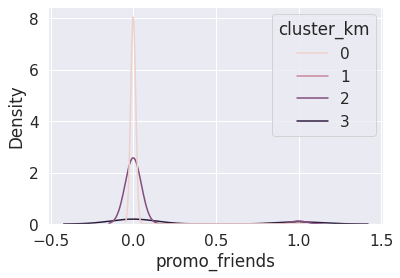

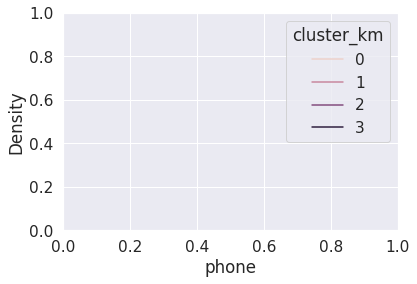

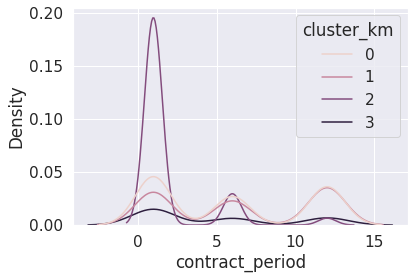

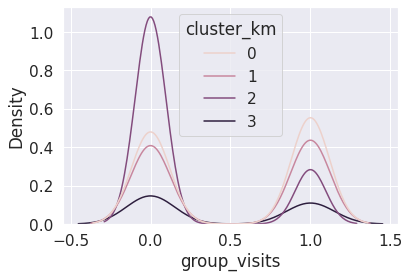

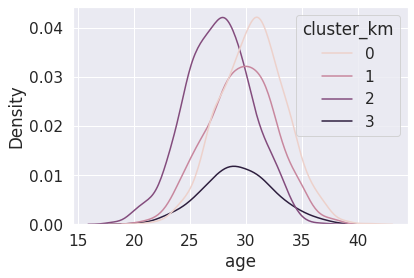

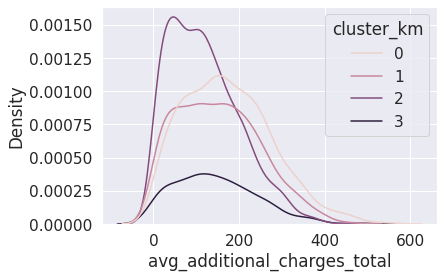

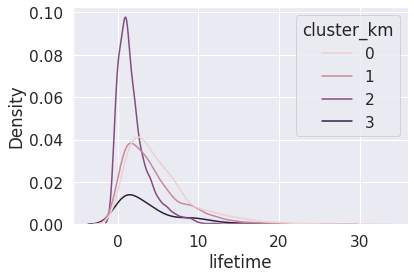

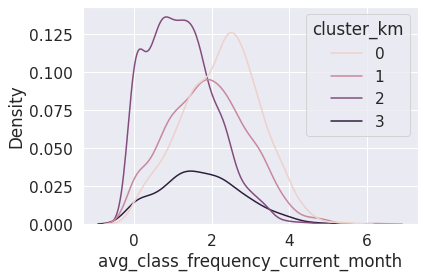

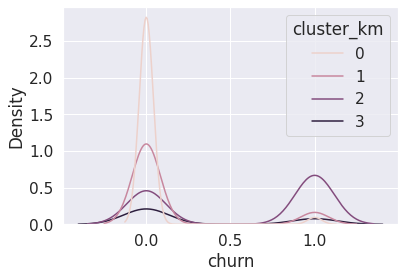

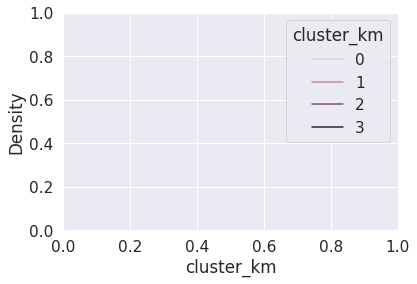

In [63]:
for col in df:
    sns.kdeplot(data=df, x=col, hue="cluster_km" )
    plt.show()

In [64]:

# Create a new column to the dataset which will have cluster labels
labels = km.labels_
df['Cluster'] = labels

In [65]:
display(df)

gender  near_location  partner  promo_friends  phone  contract_period  \
0          1              1        1              1      0                6   
1          0              1        0              0      1               12   
2          0              1        1              0      1                1   
3          0              1        1              1      1               12   
4          1              1        1              1      1                1   
...      ...            ...      ...            ...    ...              ...   
3995       1              1        1              0      1               12   
3996       0              1        0              0      1                1   
3997       1              1        1              1      1               12   
3998       0              1        1              1      1                6   
3999       1              0        1              0      0               12   

      group_visits  age  avg_additional_charges_total  lifetime  \
0                1   29                     14.227470         3   
1                1   31                    113.202938         7   
2                0   28                    129.448479         2   
3                1   33                     62.669863         2   
4                0   26                    198.362265         3   
...            ...  ...                           ...       ...   
3995             0   33                      2.406023         8   
3996             1   29                     68.883764         1   
3997             0   28                     78.250542         2   
3998             0   32                     61.912657         3   
3999             1   30                    178.861814         1   

      avg_class_frequency_current_month  churn  cluster_km  Cluster  
0                              0.000000      0           3        3  
1                              1.910244      0           0        0  
2                              1.736502      0           2        2  
3                              3.357215      0           1        1  
4                              1.120078      0           1        1  
...                                 ...    ...         ...      ...  
3995                           2.349070      0           0        0  
3996                           0.292859      1           2        2  
3997                           2.831439      0           1        1  
3998                           1.596237      0           1        1  
3999                           1.035270      0           3        3  

[4000 rows x 14 columns]

Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?

In [66]:
df.groupby('churn')['Cluster'].value_counts()

churn  Cluster
0      0          1203
       1           917
       2           536
       3           283
1      2           782
       1           136
       3           103
       0            40
Name: Cluster, dtype: int64

In [67]:
df2=df.groupby('Cluster')['churn'].value_counts().rename('percentage').transform(lambda x: x/x.sum()*100).reset_index()

In [68]:
display(df2)

Cluster  churn  percentage
0        0      0      30.075
1        0      1       1.000
2        1      0      22.925
3        1      1       3.400
4        2      1      19.550
5        2      0      13.400
6        3      0       7.075
7        3      1       2.575

Clusters 0 and 1 are the most dense, and among the two we can observe a greater loyalty of the cluster 1, with only 3.27% of churn rate on the total amount of customers, against a god 28% of active customers( on the total amount.

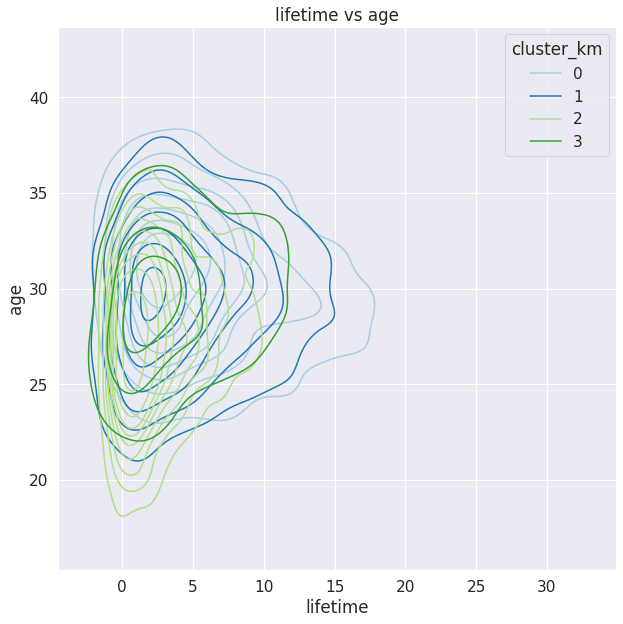

In [69]:
show_clusters_on_plot(df, 'lifetime','age', 'cluster_km')

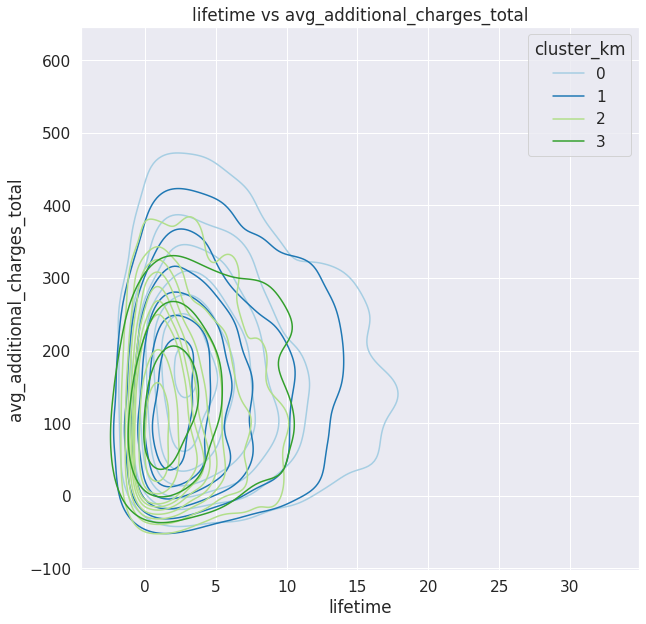

In [70]:
show_clusters_on_plot(df, 'lifetime','avg_additional_charges_total', 'cluster_km')

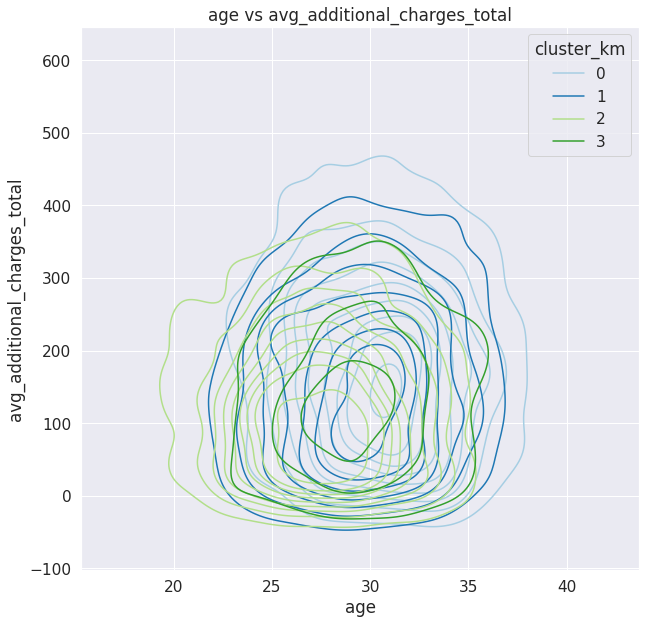

In [71]:
show_clusters_on_plot(df, 'age','avg_additional_charges_total', 'cluster_km')

The clusters are similar, but can we still can find some clue about tendencies.

# Conclusions and Basic Recommendations on Working with Customers

After analyzing the distributions of features and churn rates, I found certain behaviors and groups of customers with a slight tendency to be more loyal and engaged with the gym and its activities:

1. **Promotion of Longer Subscriptions:** Customers with longer lifetimes tend to be more engaged in using the gym and attending classes. Therefore, it's advisable to promote subscriptions longer than 3 months, such as 6-month or yearly memberships, through initiatives like coupons, gadgets, or discounts. This approach fosters a sense of belonging and motivation to maintain attendance.

2. **Encouragement of Class Attendance:** Customers who spend more time in the gym, both in terms of overall lifetime engagement and frequency of attending classes, also tend to spend more money on additional services. Hence, promoting the attendance of 2 or more classes could be beneficial in enhancing customer loyalty and increasing revenue.

3. **Targeting the 30-Year-Old Demographic:** It is observed that customers around the age of 30 demonstrate higher propensity to maintain gym attendance and spend more on wellness-related services. To capitalize on this trend, implementing targeted marketing strategies tailored to the preferences and motivations of this demographic could effectively attract and retain customers who are more inclined towards long-term gym engagement and expenditure.

